## Método de Simpson

Definamos una función $f$ al que queramos calcular su integral en un intevalo $[a,b]$. Primero definimos nuestra función $f$:

In [134]:
# Definimos la función:

f(x) = x^3 + x^2 + 1

f (generic function with 1 method)

In [135]:
# Observación: Si nos dan valores arbitrarios de a, b, y e donde a y b son los limites de nuestro intervalo y e es la longitud del subintervalo, el valor (b-a)/e + 1 (que debe ser el número de subintervalos en nuestro linspace) no es necesariamente entero. Por ello, se aproximó la longitud del intervalo usando la función round(x) para usar (b-a)/e + 1 como un entero y como el número de subintervalos en el código.

function metodo_simpson(f,a,b,e)   
    
    y = linspace(a,b,round((b-a)/e) + 1) # Definimos el linspace con los parámetros que nosotros queremos.
    n = Int(round((b-a)/e) + 1) # Aproximación del número de subintervalos.
    sum = zeros(n) # Definimos una lista vacía que contendrá las aportaciones de cada subintervalo.
    dx = y[2]- y[1] # Definimos una nueva longitud de nuestro subintervalo que es es aproximadamente igual a e.
    suma = 0 # Valor aproximado de la integral
    
    # Método de Simpson
    
    for i in 1:n
        
        x = dx*(f(y[i]) + 4*f((y[i] + dx/2)) + f((y[i]+dx)))/6 # (a+b)/2 = (a+(a+dx))/2 = a + dx/2
        sum[i] = x
    end
    
    # Suma de todos las aportaciones
    
    for i in 1:n
        suma = suma + sum[i]      
    end
    
    return suma
    
end

metodo_simpson (generic function with 1 method)

Para un intervalo de $[-4,5]$ con una longitud de subinteralo de aproximadamente 0.000001:

In [136]:
metodo_simpson(f,-4,5,0.000001)

164.25015102299992

Para un intervalo de $[-10,0]$ con una longitud de subinteralo de aproximadamente 0.0025:

In [137]:
metodo_simpson(f,-10,0,0.0025)

-2156.6641666610294

## Interpolación polinomial de Lagrange

Definamos nuestra lista de puntos en que quieres hacer la interpolación polinomial:

In [22]:
listx = linspace(0,2*pi,10)

0.0:0.6981317007977318:6.283185307179586

Luego, definamos la función que queremos aproximar:

In [23]:
f(x) = cos(x)

f (generic function with 1 method)

Hagamos una función que nos genera una lista con los elementos $f(x_i)$ para cada elemento de nuestra lista `x`

In [24]:
function f_list(f,x)
    listy = zeros(10)
    
    for i in 1:10
        listy[i]=f(listx[i])
    end
    return listy
end

f_list (generic function with 1 method)

In [25]:
f_list(f,listx)

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

El codigo para la interpolación polinomial:

In [26]:
# function interpol(listx,listy,x)

## Comparación gráfica de la convergencia de 3 métodos de integración numérica

Para esta comparacion, añademos los otros dos métodos que se hicieron para la tarea 6:

In [138]:
# Observación: Si nos dan valores arbitrarios de a, b, y e donde a y b son los limites de nuestro intervalo y e es la longitud del subintervalo, el valor (b-a)/e + 1 (que debe ser el número de subintervalos en nuestro linspace) no es necesariamente entero. Por ello, se aproximó la longitud del intervalo usando la función round(x) para usar (b-a)/e + 1 como un entero y como el número de subintervalos en el código.

function metodo_rectangulo(f,a,b,e)   
    
    y = linspace(a,b,round((b-a)/e) + 1) # Definimos el linspace con los parámetros que nosotros queremos.
    n = Int(round((b-a)/e) + 1) # Aproximación del número de subintervalos.
    sum = zeros(n) # Definimos una lista vacía que contendrá las aportaciones de cada subintervalo.
    dx = y[2]- y[1] # Definimos una nueva longitud de nuestro subintervalo que es es aproximadamente igual a e.
    suma = 0 # Valor aproximado de la integral
    
    # Método del rectángulo
    
    for i in 1:n
        
        x = dx *f((y[i] + dx/2)) # (a+b)/2 = (a+(a+dx))/2 = a + dx/2
        sum[i] = x
    end
    
    # Suma de todos las aportaciones
    
    for i in 1:n
        suma = suma + sum[i]      
    end
    
    return suma
    
end

metodo_rectangulo (generic function with 1 method)

In [139]:
function metodo_trapecio(f,a,b,e)   
       
    y = linspace(a,b,round((b-a)/e) + 1) # Definimos el linspace con los parámetros que nosotros queremos.
    n = Int(round((b-a)/e) + 1) # Aproximación del número de subintervalos.
    sum = zeros(n) # Definimos una matrix vacía que contendrá las aportaciones de cada subintervalo.
    dx = y[2]- y[1] # Definimos una nueva longitud de nuestro subintervalo que es es aproximadamente igual a e.
    suma = 0 # Valor aproximado de la integral
    
    # Método del trapecio
    
    for i in 1:n
        
        x = dx*(f(y[i]) + f((y[i]+dx))/2 # (a+b)/2 = (a+(a+dx))/2 = a + dx/2
        sum[i] = x
    end
    
    # Suma de todos las aportaciones
    
    for i in 1:n
        suma = suma + sum[i]      
    end
    
    return suma
    
end

LoadError: [91msyntax: missing comma or ) in argument list[39m

Definamos nuestra función $f(x)=-\sin(x)$ y nuestro intervalo de integración como $[0,2\pi]$

In [140]:
f(x)=-sin(x)

f (generic function with 1 method)

Definamos una función para cada método de integración que genera una lista de valores de la integral calculada para un $\Delta x=1/2^{i-1}$:

In [141]:
# Función que nos genera una lista cuyas entradas son valores de la integral en función de una dx dada. En este caso, se tomó dx=1/2^n para algún n. Se hizo una función para cada método de integración.

# Para el método del rectángulo

function con_rect(f,a,b,n)
    rectlist=zeros(n)
    
    for i in 1:n
        rectlist[i] =  metodo_rectangulo(f,a,b,1/2^(i-1))
    end
    return rectlist
end

# Para el método del trapecio

function con_trap(f,a,b,n)
    traplist=zeros(n)
    
    for i in 1:n
        traplist[i] =  metodo_trapecio(f,a,b,1/2^(i-1))
    end
    return traplist
end

# Para el método de Simpson

function con_simp(f,a,b,n)
    simplist=zeros(n)
    
    for i in 1:n
        simplist[i] =  metodo_simpson(f,a,b,1/2^(i-1))
    end
    return simplist
end

con_simp (generic function with 1 method)

In [142]:
con_simp(f,0,2*pi,10)

10-element Array{Float64,1}:
 -0.500216   
 -0.114546   
 -0.0314169  
 -0.0078853  
 -0.0019344  
 -0.000488542
 -0.000122143
 -3.05362e-5 
 -7.63409e-6 
 -1.90734e-6 

Para graficar nuestras listas dadas por las tres funciones anteriores, debemos hacer una función que nos regrese una lista de valores $1/\Delta x$:

In [143]:
function e_list(n)
    elist = zeros(n)
    
    for i in 1:n
        elist[i]=2^(i-1)
    end
    return elist
end

e_list (generic function with 1 method)

In [144]:
e_list(10)

10-element Array{Float64,1}:
   1.0
   2.0
   4.0
   8.0
  16.0
  32.0
  64.0
 128.0
 256.0
 512.0

Además, mandamos a llamar al paquete `PyPlot`:

In [145]:
using PyPlot

Finalmente, graficamos el valor de la integral contra $1/\Delta x$:

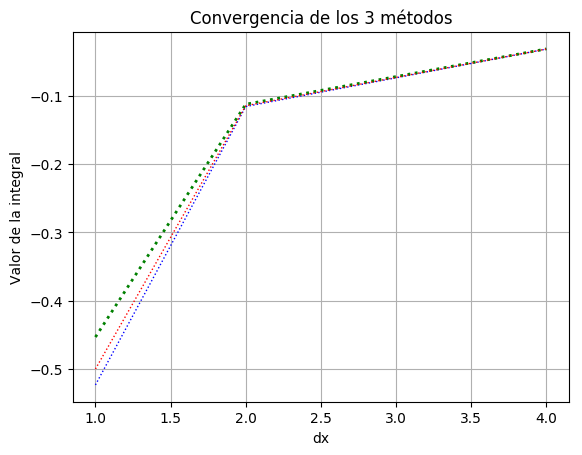

In [146]:
# Para el primero término al tercero:

xlabel("dx")
ylabel("Valor de la integral")
title("Convergencia de los 3 métodos")
grid("on")

plot((e_list(3)), con_rect(f,0,2*pi,3), color="blue", linewidth=1.0, linestyle=":")
plot((e_list(3)), con_trap(f,0,2*pi,3), color="green", linewidth=2.0, linestyle=":")
plot((e_list(3)), con_simp(f,0,2*pi,3), color="red", linewidth=1.0, linestyle=":")
show();

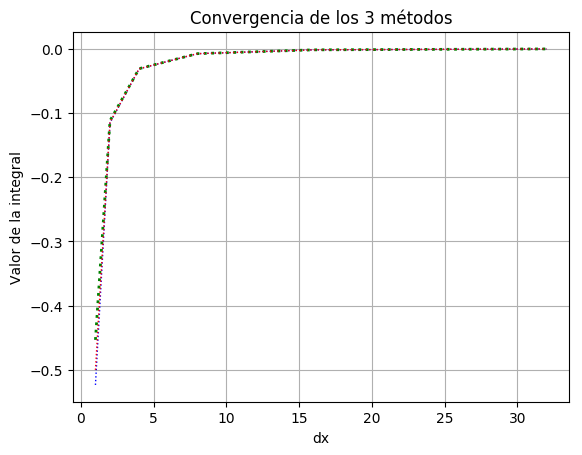

In [147]:
# Para el primero término al décimo:

xlabel("dx")
ylabel("Valor de la integral")
title("Convergencia de los 3 métodos")
grid("on")

plot((e_list(6)), con_rect(f,0,2*pi,6), color="blue", linewidth=1.0, linestyle=":")
plot((e_list(6)), con_trap(f,0,2*pi,6), color="green", linewidth=2.0, linestyle=":")
plot((e_list(6)), con_simp(f,0,2*pi,6), color="red", linewidth=1.0, linestyle=":")
show();

Nosotros sabemos que $$\displaystyle \int_0^{2\pi} \sin(x) \, dx = 0.$$

Así que tiene sentido que el valor de la integral dada por cada métodos converjan a $0$.

En la primera gráfica, podemos observar que los tres métodos para el primero valor de $\Delta x$ dan un valor distinto, pero que después del segundo valor de $\Delta x$ son aproximadamente iguales. En la segunda gráfica, se puede observar que a partir de $1/\Delta x \approx 15$, la aproximación es muy cercana al valor esperado. Esto es, para $\Delta x \approx 1/15$. Además, para esta función, la aproximación es mejor para el método del trapecio, seguido por el método de Simpson y finalmente el método del rectángulo.